## Sales Forecasting Challenge - EDA

#### Problem Statement
Predicting the sales values of SKUs is important for any business. It helps the business plan better,
making it grow faster. This challenge is associated with a similar problem, where weekly forecast
must be generated for ABC Retail Pvt. Ltd. This retail giant has multiple stores, and each store has
multiple departments. The department head has the responsibility in each store to maintain the
inventory, keep track of stock and make demands based on market condition. This challenge can be
utilized by Data Scientists to create state-of-the-art solutions for this retailer, to help them predict
the sales based on the given dataset.

#### Objective
To predict weekly sales for each department in each store. Training data consists of weekly level sales
from Feb 2010-Apr 2012. The forecasts must be submitted for the time-period May 2012 – Oct 2012.

In [1]:
# import all libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [2]:
# read csv file and store it into a dataframe
df = pd.read_csv("2. train_sales_forecast.csv")
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05-02-2010,25037.08,False
1,1,1,12-02-2010,46247.44,True
2,1,1,19-02-2010,41783.43,False
3,1,1,26-02-2010,19491.18,False
4,1,1,05-03-2010,21926.49,False


In [3]:
df.shape

(84056, 5)

In [4]:
# check if there is any null values in the dataset
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [5]:
# get some basic info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84056 entries, 0 to 84055
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         84056 non-null  int64  
 1   Dept          84056 non-null  int64  
 2   Date          84056 non-null  object 
 3   Weekly_Sales  84056 non-null  float64
 4   IsHoliday     84056 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 2.6+ MB


#### Observation: 
1. There is no null values in the dataset
2. I can see the Date column dtype is object, so convert it into a pandas datetime dtype

In [6]:
# convert date column to datetime dtype
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84056 entries, 0 to 84055
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         84056 non-null  int64         
 1   Dept          84056 non-null  int64         
 2   Date          84056 non-null  datetime64[ns]
 3   Weekly_Sales  84056 non-null  float64       
 4   IsHoliday     84056 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 2.6 MB


In [7]:
# get an statistical measure of the columns of the dataframe
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Store,84056.0,5.49925,1.0,3.0,6.0,8.0,10.0,2.868216
Dept,84056.0,44.366553,1.0,20.0,38.0,72.0,99.0,29.77392
Date,84056,2011-03-17 21:49:38.814123776,2010-02-05 00:00:00,2010-08-27 00:00:00,2011-03-18 00:00:00,2011-10-07 00:00:00,2012-04-27 00:00:00,NaN
Weekly_Sales,84056.0,24142.461316,-1102.96,4344.025,12815.605,32892.2025,696229.89,30218.249316


#### Observation:
1. Store column min value is 1 and max value is 10, as mentioned in the problem statement.
2. Similarly for Dept column min value is 1 and max value is 99.
3. Date min value is 2010-02-05 i.e Feb 2010 and max value is 2012-04-27 i.e. April 2012.
4. Weekly sales min value is -1102.96 which is Negative, and max value is 696229.89

#### Can weekly sales value be Negative or it is erroneous data?
I referred to Quora and find the below answer. It can be Negative from an accounting point of view. This is because most business not only sell products, they take back returns, offer refunds, etc. If, in a week, the store had more returns that actual new sales, then your sales are negative. <br>
[Reference Link](https://www.quora.com/Why-are-the-sales-negative-on-the-first-week-of-the-month-versus-the-last-week#:~:text=From%20an%20accounting%20point%20of,then%20your%20sales%20are%20negative.&text=Why%20are%20top%20earning%20partners,%22this%20week%20last%20month%22%3F)

#### Conclusion:
As weekly sales can be negative, I am not considering them as erroneous data and keeping them as it is.

In [8]:
# check is there is any Zero sales for any week in the data given
df_zero_sales = df[df.Weekly_Sales == 0]
df_zero_sales.shape

(17, 5)

In [9]:
df_zero_sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
4967,1,47,2011-03-11,0.0,False
4971,1,47,2011-08-12,0.0,False
4972,1,47,2011-08-19,0.0,False
13364,2,47,2012-04-13,0.0,False
14307,2,60,2010-03-19,0.0,False


In [10]:
# check the Negative sales for any week in the data given
df_negative_sales = df[df.Weekly_Sales < 0]
df_negative_sales.shape

(182, 5)

In [11]:
# check how many unique stores are there in the dataset
df.Store.nunique()

10

In [12]:
df.Store.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [13]:
# check how many unique departments are there in the dataset
df.Dept.nunique()

81

In [14]:
unique_depts = df.Dept.unique()
unique_depts.sort()
unique_depts

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52,
       54, 55, 56, 58, 59, 60, 65, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82,
       83, 85, 87, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99], dtype=int64)

#### Observation:
Even though it is mentioned that there are 99 departments in each store but 81 stores are present accross all the stores. May be all the categories are not available now and may be included later.

In [15]:
# check for every store how many categories are available
df.groupby("Store")["Dept"].nunique()

Store
1     77
2     78
3     78
4     77
5     77
6     79
7     78
8     77
9     78
10    78
Name: Dept, dtype: int64

In [16]:
# check how many store-department combinations present in the dataset
df.groupby("Store")["Dept"].nunique().sum()

777

#### Objective Discussion:
The objective is to predict weekly sales for each department in each store. So, every store and department combination will form a series. <br> Mathematically there could be 10 * 99 = 990 combinations i.e. 990 series. As few of the departments are missing, there are 777 series present in the given dataset. So this is a Multi-Series time series forecasting problem.

In [17]:
# analyze the number of records present for every store-department combination
grouped = df.groupby(["Store", "Dept"])["Dept"].count()
grouped_df = grouped.reset_index(name='Count')
grouped_df.head()

,Store,Dept,Count
0,1,1,117
1,1,2,117
2,1,3,117
3,1,4,117
4,1,5,117


In [18]:
grouped_df = grouped_df.sort_values(by="Count", ascending=False)
grouped_df.tail()

,Store,Dept,Count
658,9,39,1
291,4,77,1
427,6,43,1
447,6,77,1
759,10,78,1


In [19]:
grouped_df_missing_data = grouped_df[grouped_df.Count < grouped_df.Count.max()]
grouped_df_missing_data.shape

(104, 3)

In [20]:
grouped_df_missing_data.head(20)

,Store,Dept,Count
737,10,41,116
281,4,54,116
670,9,54,116
364,5,60,116
437,6,54,116
518,7,58,116
359,5,54,115
277,4,48,115
200,3,48,115
126,2,54,114


In [21]:
grouped_df_missing_data.tail(20)

,Store,Dept,Count
448,6,78,8
279,4,51,8
215,3,78,8
214,3,77,7
587,8,47,7
540,7,96,7
59,1,78,4
114,2,39,4
58,1,77,3
602,8,77,3


#### Observation:
We can observe that not every series consists of the same number of data. That means there may be missing entries (entire record of the week) for the weeks between the start week and the end week and there are 104 such combinations with missing data. <br>
Before we perform any statistical analysis on this time-seris data, the data needs to be evenly spaced i.e. it is required to maintain a consistent frequency or span for the data points. To make it consistent I will figire out the missing week row entries for a store-department combination and impute it with Zero assuming that the record is not present because there were no sales for this store-department combination on that week.

In [22]:
# check the minimum and maximum date present in the dataset
df.Date.min(), df.Date.max()

(Timestamp('2010-02-05 00:00:00'), Timestamp('2012-04-27 00:00:00'))

In [23]:
import warnings
warnings.filterwarnings('ignore')

In [24]:
def impute_missing_rows(df):
    # get minimum and maximum dates from the entire dataframe
    end_date = df.Date.max()
    start_date = df.Date.min()
    # get all the unique stores in the dataframe
    for store_no in df.Store.unique():
        df_store = df[df.Store == store_no]
        # get all the departments from that store
        for dept_no in df_store.Dept.unique():
            df_store_dept = df_store[df_store.Dept == dept_no]
            # start_date = df_store_dept.Date.min()
            current_date = start_date
            while current_date <= end_date:
                # if a date is not present, impute it with Zero sales
                if current_date not in df_store_dept.Date.values:
                    # print([store_no, dept_no, current_date])
                    try:
                        # get the holiday information of the missing date from the entire df
                        is_holiday = df[df.Date == current_date]['IsHoliday'].values[0]
                    except:
                        print("Date not present in the entire dataframe, considering False")
                        is_holiday = False
                    df.loc[len(df)] = [store_no, dept_no, current_date, 0, is_holiday]
                current_date += timedelta(days=7)
    return df

#### Missing Value Imputation:

In [25]:
print(f"Number of rows present in the dataframe before imputation: {df.shape[0]}")
df = impute_missing_rows(df)
print(f"Number of rows present in the dataframe after imputation: {df.shape[0]}")

Number of rows present in the dataframe before imputation: 84056
Number of rows present in the dataframe after imputation: 90909


In [26]:
# compute the number of records possible for each store-department combination between start-date and end-date
start_date = df.Date.min()
end_date = df.Date.max()

# Generate dates with a 7-day interval
date_range = pd.date_range(start=start_date, end=end_date, freq='7D')
date_list = date_range.tolist()
print(f"Number of records should be present is {len(date_list)}")

Number of records should be present is 117


In [27]:
# no of store-dept combinations available
no_of_series = df.groupby("Store")["Dept"].nunique().sum()
no_of_records_each = len(date_list)
total_no_of_records_after_imputation = no_of_series * no_of_records_each
print(f"Expected no of records in the dataframe after imputation is {total_no_of_records_after_imputation}")

Expected no of records in the dataframe after imputation is 90909


In [28]:
if df.shape[0] == total_no_of_records_after_imputation:
    print("All the missing rows are imputed.")
else:
    print("All the missing rows are not imputed.")

All the missing rows are imputed.


In [29]:
# analyze the number of records present for every store-department combination
grouped = df.groupby(["Store", "Dept"])["Dept"].count()
grouped_df = grouped.reset_index(name='Count')
grouped_df = grouped_df.sort_values(by="Count", ascending=False)
grouped_df.head()

,Store,Dept,Count
0,1,1,117
534,7,90,117
512,7,50,117
513,7,51,117
514,7,52,117


In [30]:
grouped_df.tail()

,Store,Dept,Count
262,4,31,117
263,4,32,117
264,4,33,117
265,4,34,117
776,10,99,117


In [31]:
# finally check if there is any missing values in the dataset
df.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

#### Conclusion:
After imputation there is consistent count for for each store-dept combination i.e data is present for every week for every store-department combination present in the dataset. Now the dataset is evenly spaced i.e. maintaining a consistent frequency.

## Extracting insights from the data and Visualization:

#### Store with maximum aggregated sales accross all the category:

In [32]:
df_store_max_sales = df.groupby('Store')[['Weekly_Sales']].sum()
df_store_max_sales.rename(columns={'Weekly_Sales':'Total_Sales'}, inplace=True)
df_store_max_sales = df_store_max_sales.sort_values(by='Total_Sales', ascending=False)
df_store_max_sales = df_store_max_sales.reset_index()
df_store_max_sales['Total_Sales_Million'] = df_store_max_sales['Total_Sales']/(10**6)
df_store_max_sales['Total_Sales_Million'] = df_store_max_sales['Total_Sales_Million'].round(2)
df_store_max_sales

,Store,Total_Sales,Total_Sales_Million
0,7,2.480386e+08,248.04
1,3,2.445867e+08,244.59
2,6,2.343016e+08,234.30
3,2,2.271115e+08,227.11
4,5,2.265248e+08,226.52
5,9,2.099277e+08,209.93
6,4,1.841057e+08,184.11
7,1,1.822552e+08,182.26
8,8,1.588877e+08,158.89
9,10,1.135791e+08,113.58


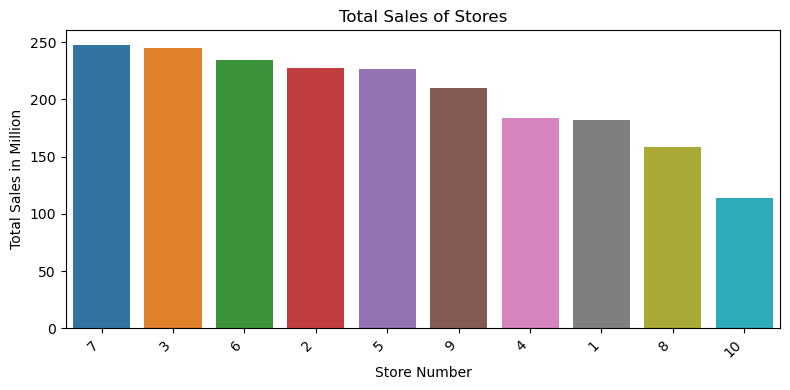

In [33]:
# Plot the data using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='Store', y='Total_Sales_Million', data=df_store_max_sales, order=df_store_max_sales['Store'])
plt.xlabel('Store Number')
plt.ylabel('Total Sales in Million')
plt.title('Total Sales of Stores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Observarion:
1. Store 7 has highest aggregated sales and store 10 has lowest aggregated sales overall.

#### Store with maximum average sales accross all the category:

In [34]:
df_store_avg_sales = df.groupby('Store')[['Weekly_Sales']].mean()
df_store_avg_sales.rename(columns={'Weekly_Sales':'Average_Sales'}, inplace=True)
df_store_avg_sales = df_store_avg_sales.sort_values(by='Average_Sales', ascending=False)
df_store_avg_sales = df_store_avg_sales.reset_index()
df_store_avg_sales['Average_Sales'] = df_store_avg_sales['Average_Sales'].round(2)
df_store_avg_sales

,Store,Average_Sales
0,7,27179.33
1,3,26801.09
2,6,25349.09
3,5,25144.28
4,2,24886.21
5,9,23003.26
6,4,20435.75
7,1,20230.35
8,8,17636.56
9,10,12445.66


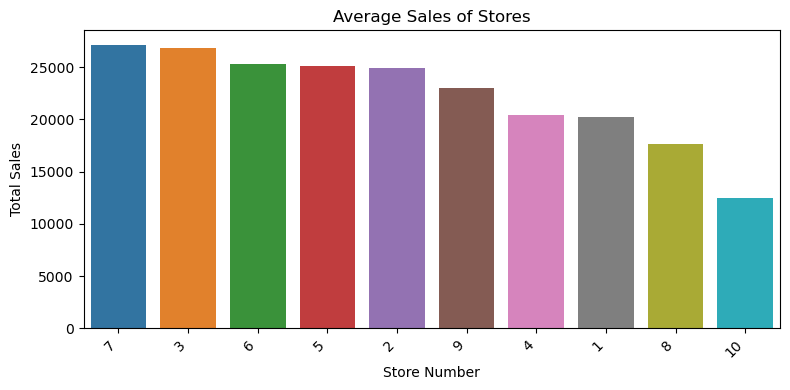

In [35]:
# Plot the data using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='Store', y='Average_Sales', data=df_store_avg_sales, order=df_store_avg_sales['Store'])
plt.xlabel('Store Number')
plt.ylabel('Total Sales')
plt.title('Average Sales of Stores')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Observarion:
1. Average sales also shows similar pattern as total sales, most selling store 7 and least selling store 10.

#### Category with maximum aggregated sales accross all the departments:

In [36]:
df_dept_max_sales = df.groupby('Dept')[['Weekly_Sales']].sum()
df_dept_max_sales.rename(columns={'Weekly_Sales':'Total_Sales'}, inplace=True)
df_dept_max_sales = df_dept_max_sales.sort_values(by='Total_Sales', ascending=False)
df_dept_max_sales = df_dept_max_sales.reset_index()
df_dept_max_sales['Total_Sales_Million'] = df_dept_max_sales['Total_Sales']/(10**6)
df_dept_max_sales['Total_Sales_Million'] = df_dept_max_sales['Total_Sales_Million'].round(2)
df_dept_max_sales.head(10)

,Dept,Total_Sales,Total_Sales_Million
0,92,1.483063e+08,148.31
1,95,1.326339e+08,132.63
2,72,9.485051e+07,94.85
3,90,8.927335e+07,89.27
4,38,8.915547e+07,89.16
5,40,8.212282e+07,82.12
6,2,7.904615e+07,79.05
7,91,6.832579e+07,68.33
8,94,6.264214e+07,62.64
9,8,6.119864e+07,61.20


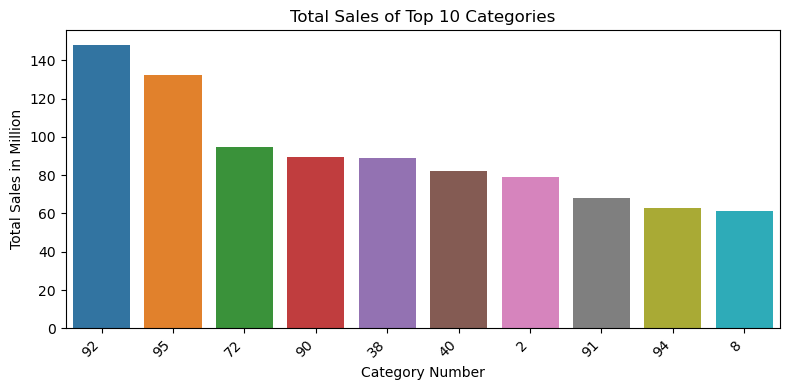

In [37]:
# Plot the data using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='Dept', y='Total_Sales_Million', data=df_dept_max_sales.head(10), order=df_dept_max_sales['Dept'].head(10))
plt.xlabel('Category Number')
plt.ylabel('Total Sales in Million')
plt.title('Total Sales of Top 10 Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Observarion:
1. Category 92 sold the most.

#### Category with maximum average sales accross all the departments:

In [38]:
df_dept_avg_sales = df.groupby('Dept')[['Weekly_Sales']].mean()
df_dept_avg_sales.rename(columns={'Weekly_Sales':'Average_Sales'}, inplace=True)
df_dept_avg_sales = df_dept_avg_sales.sort_values(by='Average_Sales', ascending=False)
df_dept_avg_sales = df_dept_avg_sales.reset_index()
df_dept_avg_sales['Average_Sales'] = df_dept_avg_sales['Average_Sales'].round(2)
df_dept_avg_sales.head(10)

,Dept,Average_Sales
0,92,126757.48
1,95,113362.34
2,72,81068.81
3,90,76302.01
4,38,76201.25
5,40,70190.44
6,2,67560.81
7,91,58398.11
8,94,53540.29
9,8,52306.53


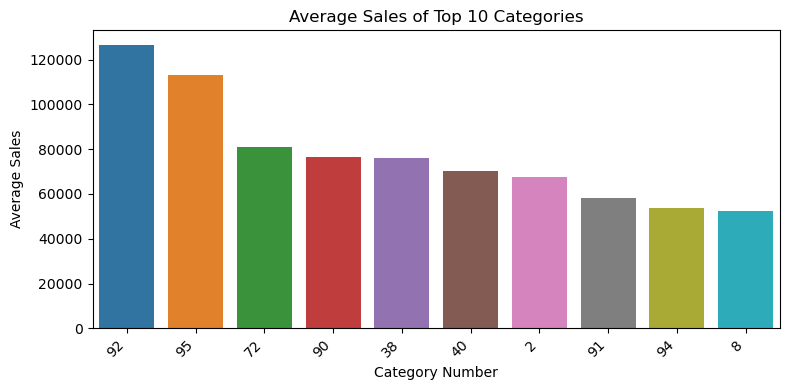

In [39]:
# Plot the data using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='Dept', y='Average_Sales', data=df_dept_avg_sales.head(10), order=df_dept_avg_sales['Dept'].head(10))
plt.xlabel('Category Number')
plt.ylabel('Average Sales')
plt.title('Average Sales of Top 10 Categories')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Observarion:
1. Average sales accross category also shows same pattern as total sales, department 92 is the highest.

#### Check the number of holidays accross the dataset.

In [40]:
df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,25037.08,False
1,1,1,2010-02-12,46247.44,True
2,1,1,2010-02-19,41783.43,False
3,1,1,2010-02-26,19491.18,False
4,1,1,2010-03-05,21926.49,False


In [41]:
df_holiday = df[['Date', 'IsHoliday']].drop_duplicates()
df_holiday.IsHoliday.value_counts()

IsHoliday
False    108
True       9
Name: count, dtype: int64

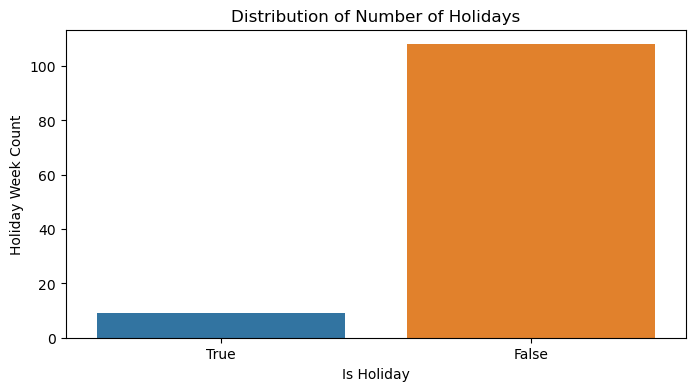

In [42]:
# Plot top 20 states from where the beneficiaries belong
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='IsHoliday',y=None, data=df_holiday, orient ="v", order=[True, False])
plt.title('Distribution of Number of Holidays')
plt.xticks()
plt.yticks()
plt.xlabel('Is Holiday')
plt.ylabel('Holiday Week Count')
plt.show()

#### Average Sales in Holiday in Week vs All Working day Week

In [43]:
df_holiday_avg_sales = df.groupby('IsHoliday')[['Weekly_Sales']].mean()
df_holiday_avg_sales.rename(columns={'Weekly_Sales':'Average_Sales'}, inplace=True)
df_holiday_avg_sales = df_holiday_avg_sales.sort_values(by='Average_Sales', ascending=False)
df_holiday_avg_sales = df_holiday_avg_sales.reset_index()
df_holiday_avg_sales['Average_Sales'] = df_holiday_avg_sales['Average_Sales'].round(2)
df_holiday_avg_sales

,IsHoliday,Average_Sales
0,True,24132.46
1,False,22171.70


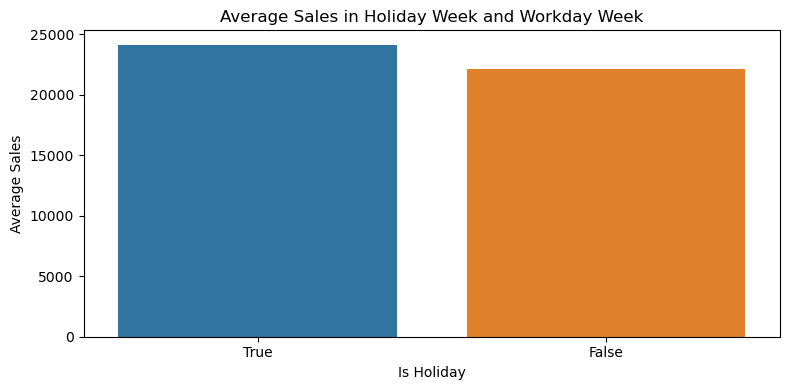

In [44]:
# Plot the data using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='IsHoliday', y='Average_Sales', data=df_holiday_avg_sales, order=[True, False])
plt.xlabel('Is Holiday')
plt.ylabel('Average Sales')
plt.title('Average Sales in Holiday Week and Workday Week')
plt.xticks()
plt.tight_layout()
plt.show()

#### Observation:
1. Average Sales of Holiday week is Higher than Non-Holiday week. We can say that people get more time for shopping in holidays.

#### Storewise average sales in holiday week vs Non-Holiday Week.

In [45]:
df_store_holiday_avg_sales = df.groupby(['Store', 'IsHoliday'])[['Weekly_Sales']].mean()
df_store_holiday_avg_sales.rename(columns={'Weekly_Sales':'Average_Sales'}, inplace=True)
df_store_holiday_avg_sales = df_store_holiday_avg_sales.sort_values(by='Average_Sales', ascending=False)
df_store_holiday_avg_sales = df_store_holiday_avg_sales.reset_index()
df_store_holiday_avg_sales['Average_Sales'] = df_store_holiday_avg_sales['Average_Sales'].round(2)
df_store_holiday_avg_sales['IsHoliday'] = df_store_holiday_avg_sales['IsHoliday'].map({True: 'Holiday', False: 'Non-Holiday'})
df_store_holiday_avg_sales.head()

,Store,IsHoliday,Average_Sales
0,7,Holiday,29205.14
1,3,Holiday,29056.46
2,5,Holiday,28163.11
3,2,Holiday,27035.94
4,7,Non-Holiday,27010.51


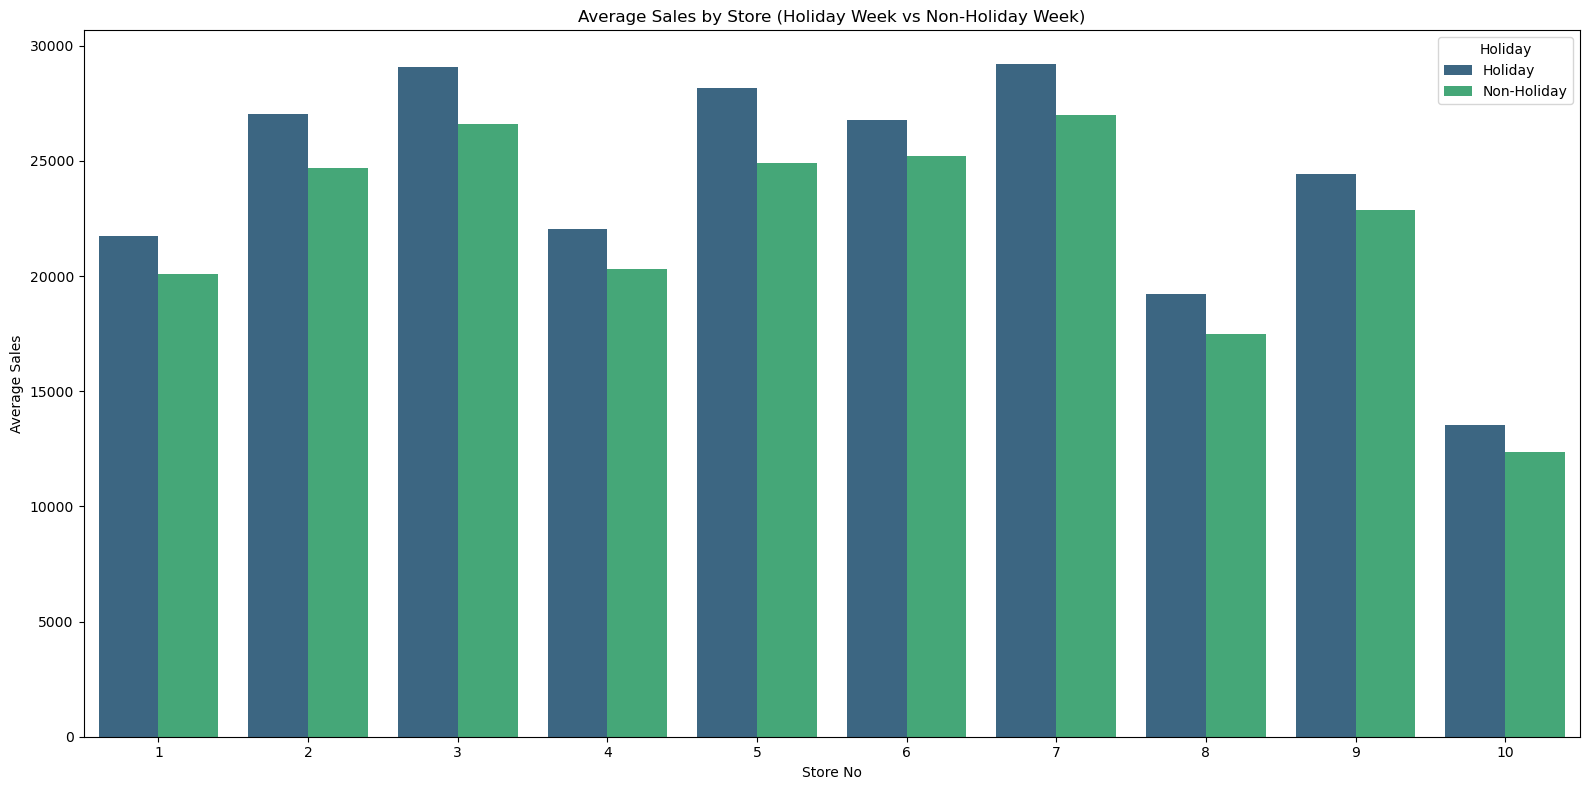

In [46]:
plt.figure(figsize=(16, 8))
sns.barplot(x='Store',y='Average_Sales', data=df_store_holiday_avg_sales, hue="IsHoliday", hue_order=['Holiday', 'Non-Holiday'], palette='viridis')
plt.title('Average Sales by Store (Holiday Week vs Non-Holiday Week)')
plt.xlabel('Store No')
plt.ylabel('Average Sales')
plt.xticks()
plt.legend(title='Holiday')
plt.tight_layout()
plt.show()

#### Conclusion:
1. Holiday week sales is higher accross all the stores.

In [47]:
df_dept_holiday_avg_sales = df.groupby(['Dept', 'IsHoliday'])[['Weekly_Sales']].mean()
df_dept_holiday_avg_sales.rename(columns={'Weekly_Sales':'Average_Sales'}, inplace=True)
df_dept_holiday_avg_sales = df_dept_holiday_avg_sales.sort_values(by='Average_Sales', ascending=False)
df_dept_holiday_avg_sales = df_dept_holiday_avg_sales.reset_index()
df_dept_holiday_avg_sales['Average_Sales'] = df_dept_holiday_avg_sales['Average_Sales'].round(2)
df_dept_holiday_avg_sales['IsHoliday'] = df_dept_holiday_avg_sales['IsHoliday'].map({True: 'Holiday', False: 'Non-Holiday'})
df_dept_holiday_avg_sales.head()

,Dept,IsHoliday,Average_Sales
0,72,Holiday,147212.64
1,92,Holiday,134461.26
2,92,Non-Holiday,126115.50
3,95,Non-Holiday,113776.38
4,95,Holiday,108393.93


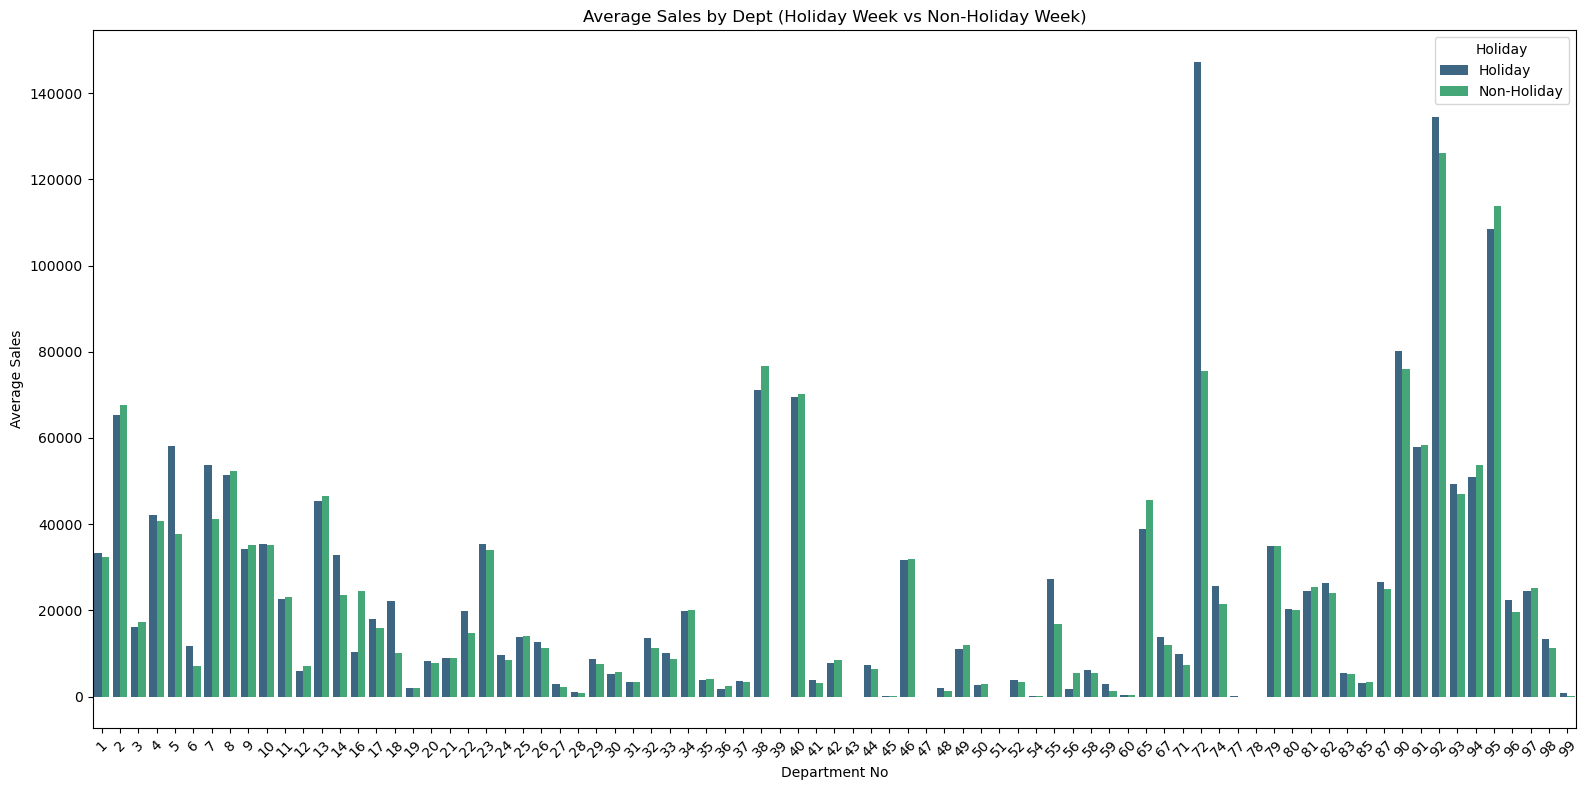

In [48]:
plt.figure(figsize=(16, 8))
sns.barplot(x='Dept',y='Average_Sales', data=df_dept_holiday_avg_sales, hue="IsHoliday", hue_order=['Holiday', 'Non-Holiday'], palette='viridis')
plt.title('Average Sales by Dept (Holiday Week vs Non-Holiday Week)')
plt.xlabel('Department No')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend(title='Holiday')
plt.tight_layout()
plt.show()

Instead of looking all the departments, let's look at the top 20 departments which is sold the most.

In [49]:
# we will get his data from the previously computed dataframe
top_20_selling_dept = df_dept_avg_sales.head(20).Dept.values
df_dept_holiday_avg_sales_top20 = df_dept_holiday_avg_sales[df_dept_holiday_avg_sales.Dept.isin(top_20_selling_dept)]
df_dept_holiday_avg_sales_top20.head()

,Dept,IsHoliday,Average_Sales
0,72,Holiday,147212.64
1,92,Holiday,134461.26
2,92,Non-Holiday,126115.50
3,95,Non-Holiday,113776.38
4,95,Holiday,108393.93


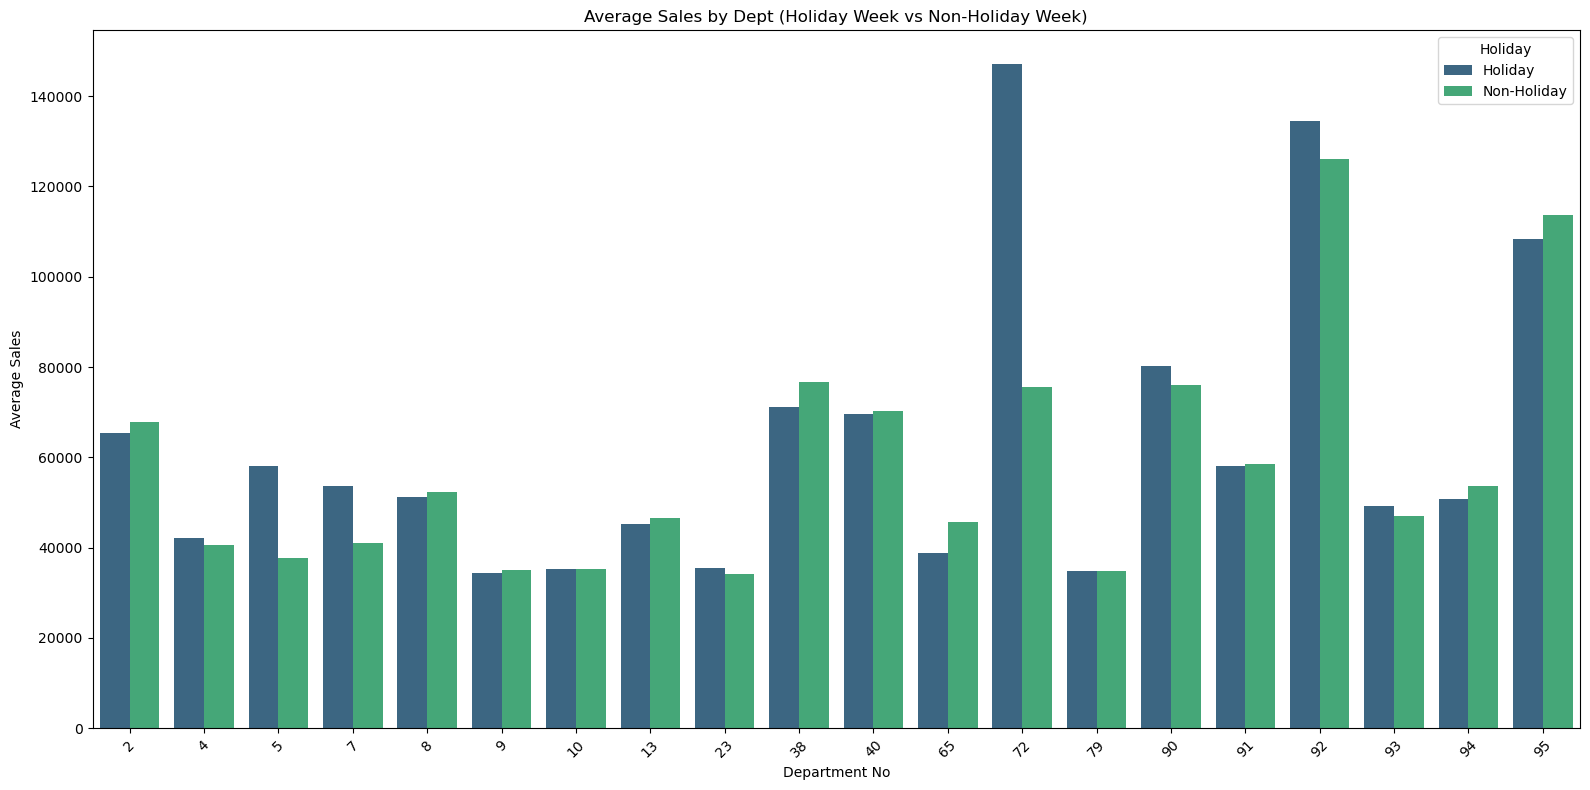

In [50]:
plt.figure(figsize=(16, 8))
sns.barplot(x='Dept',y='Average_Sales', data=df_dept_holiday_avg_sales_top20, hue="IsHoliday", hue_order=['Holiday', 'Non-Holiday'], palette='viridis')
plt.title('Average Sales by Dept (Holiday Week vs Non-Holiday Week)')
plt.xlabel('Department No')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.legend(title='Holiday')
plt.tight_layout()
plt.show()

#### Observation:
1. Few departmet's selling is higher in holiday week and few department's is non-holiday week.
2. Department 72 has a huge difference in selling holiday vs non-holiday week. It is mostly sold in holiday week.

#### Compute weekly sales for each store accross all the departments:

In [51]:
df_store_weekly_sales = df.groupby(['Store', 'Date'])[['Weekly_Sales']].sum()
df_store_weekly_sales = df_store_weekly_sales.reset_index()
df_store_weekly_sales = df_store_weekly_sales.sort_values(by=['Store', 'Date'], ascending=True)
df_store_weekly_sales['Weekly_Sales'] = df_store_weekly_sales['Weekly_Sales'].round(2)
df_store_weekly_sales.head()

,Store,Date,Weekly_Sales
0,1,2010-02-05,1651114.99
1,1,2010-02-12,1649373.70
2,1,2010-02-19,1619248.95
3,1,2010-02-26,1416094.92
4,1,2010-03-05,1561829.33


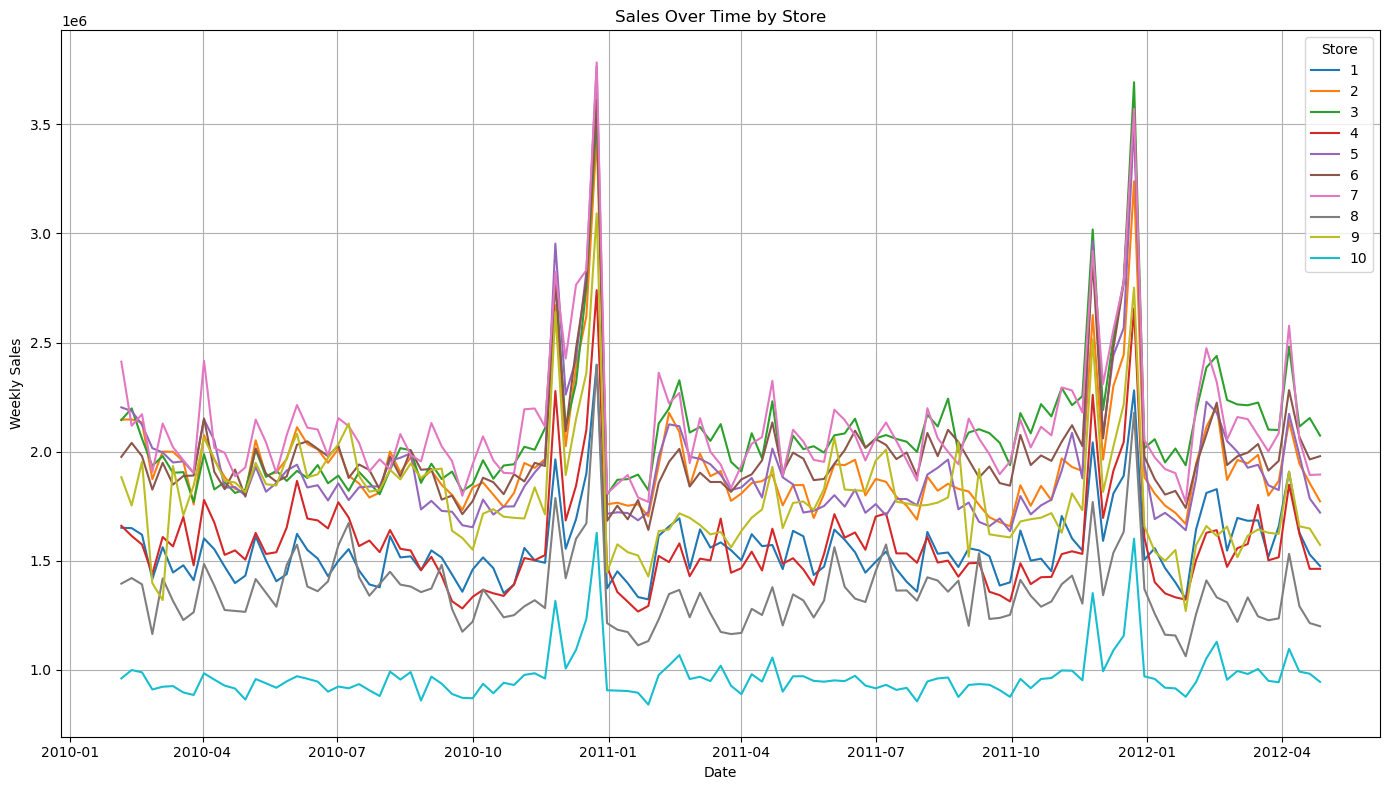

In [52]:
# Plot the data using Seaborn's lineplot
palette = sns.color_palette("tab10", 10) 
plt.figure(figsize=(14, 8))
sns.lineplot(x='Date', y='Weekly_Sales', hue='Store', data=df_store_weekly_sales, palette = palette)

# Customize the plot
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Sales Over Time by Store')
plt.legend(title='Store', loc='upper right')
plt.xticks()
plt.grid()
plt.tight_layout()
plt.show()

#### Observation:
1. All the stores shows similar pattern in selling throughout.
2. There is a spike in the selling in Nov, Dec month.

#### Compute weekly sales for each category accross all the stores:

In [53]:
df_dept_weekly_sales = df.groupby(['Dept', 'Date'])[['Weekly_Sales']].sum()
df_dept_weekly_sales = df_dept_weekly_sales.reset_index()
df_dept_weekly_sales = df_dept_weekly_sales.sort_values(by=['Dept', 'Date'], ascending=True)
df_dept_weekly_sales['Weekly_Sales'] = df_dept_weekly_sales['Weekly_Sales'].round(2)
df_dept_weekly_sales.head()

,Dept,Date,Weekly_Sales
0,1,2010-02-05,328747.26
1,1,2010-02-12,540567.65
2,1,2010-02-19,430916.80
3,1,2010-02-26,244603.78
4,1,2010-03-05,270180.97


In [54]:
# this dataframe was created before while plotting another graph
print(len(df_dept_avg_sales))
dept_list_dec_sales = df_dept_avg_sales.Dept.values
dept_list_dec_sales

81


array([92, 95, 72, 90, 38, 40,  2, 91, 94,  8, 93, 13, 65,  7,  4,  5, 10,
        9, 79, 23,  1, 46, 81, 87, 97, 82, 14, 16, 11, 74, 80, 34, 96, 55,
        3, 17, 22, 25, 67, 49, 98, 26, 32, 18, 33, 21, 24, 42, 20, 29, 71,
        6, 12, 44, 58, 30, 83, 56, 35, 37, 85, 31, 52, 41, 50, 36, 27, 19,
       59, 48, 28, 60, 99, 54, 77, 45, 51, 78, 39, 43, 47], dtype=int64)

As there are 81 departments in the dataset, I will plot 9 each department in a single plot from the descending order of average sales every week.

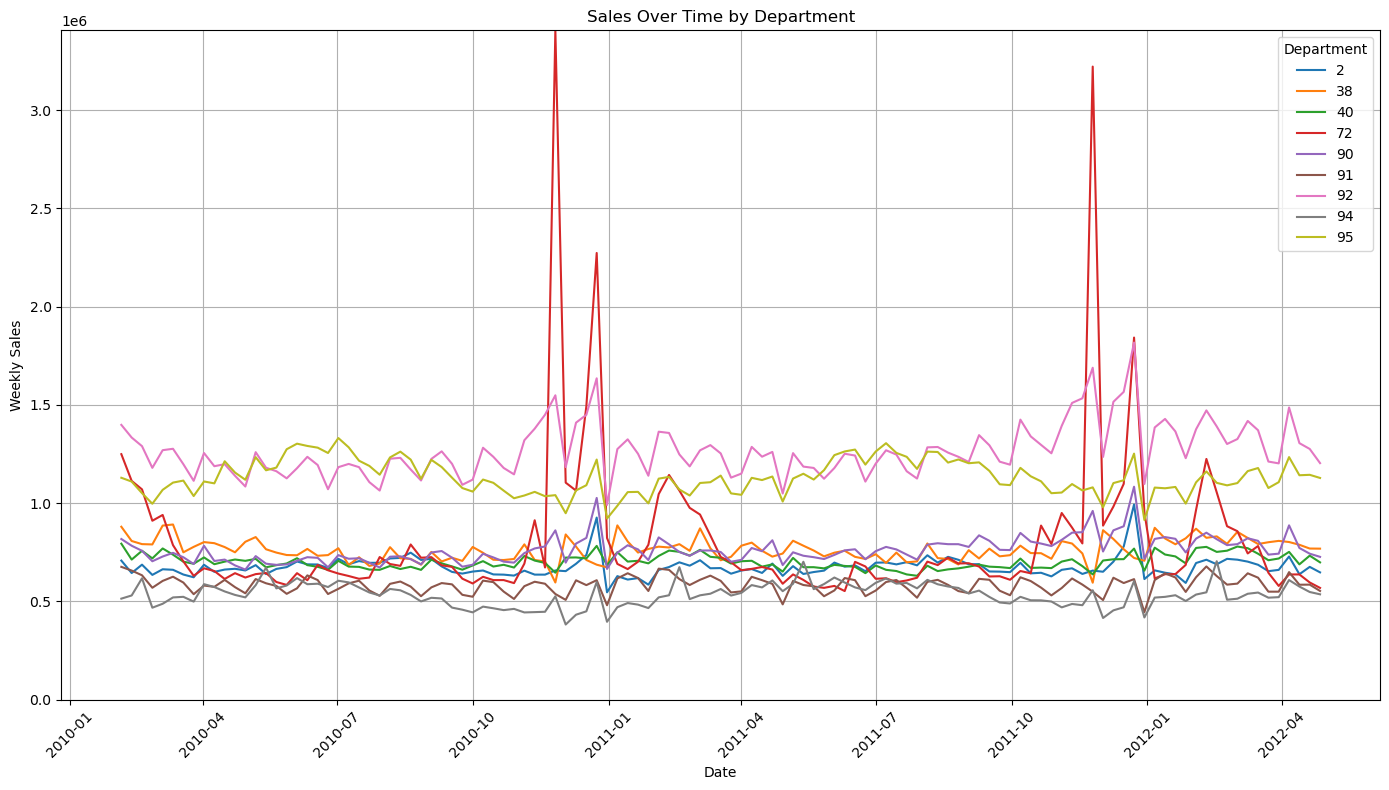

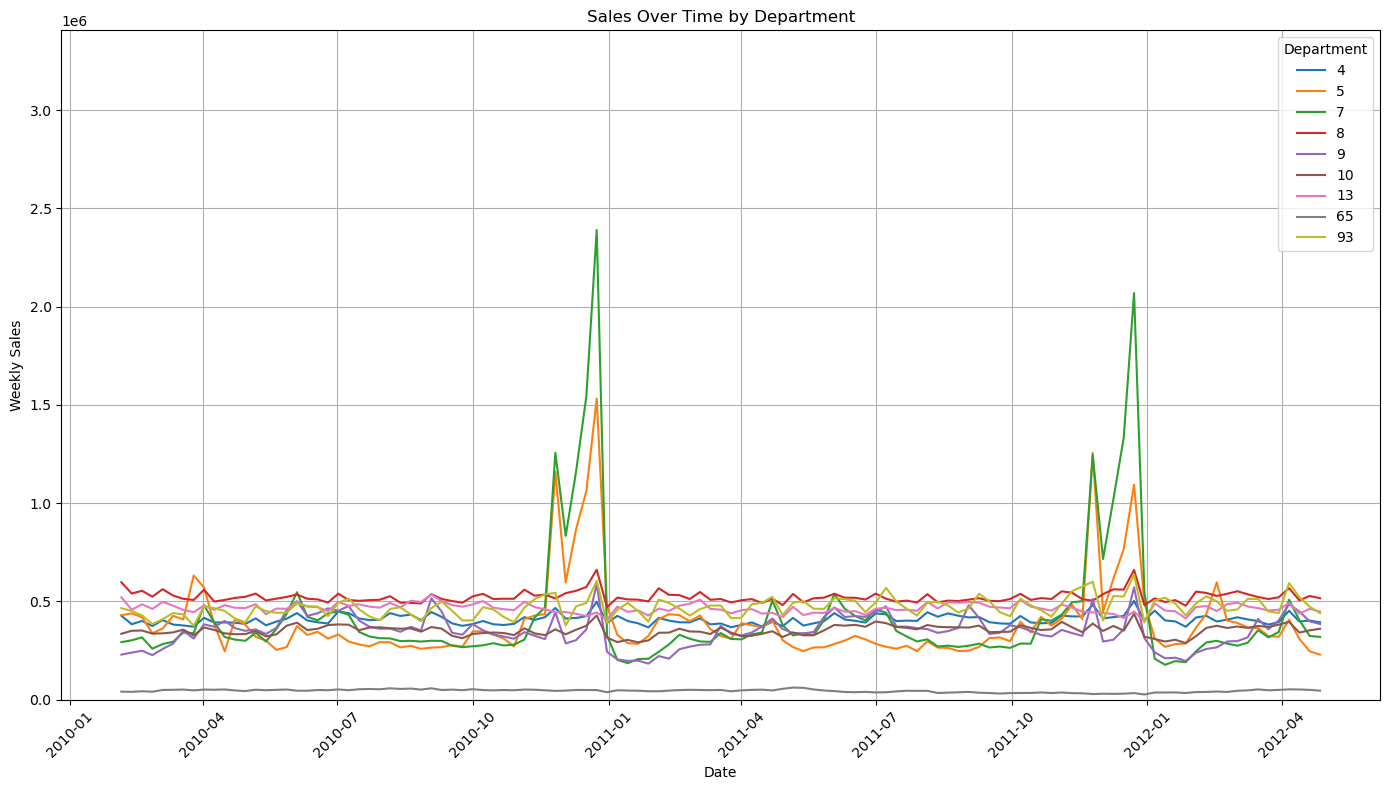

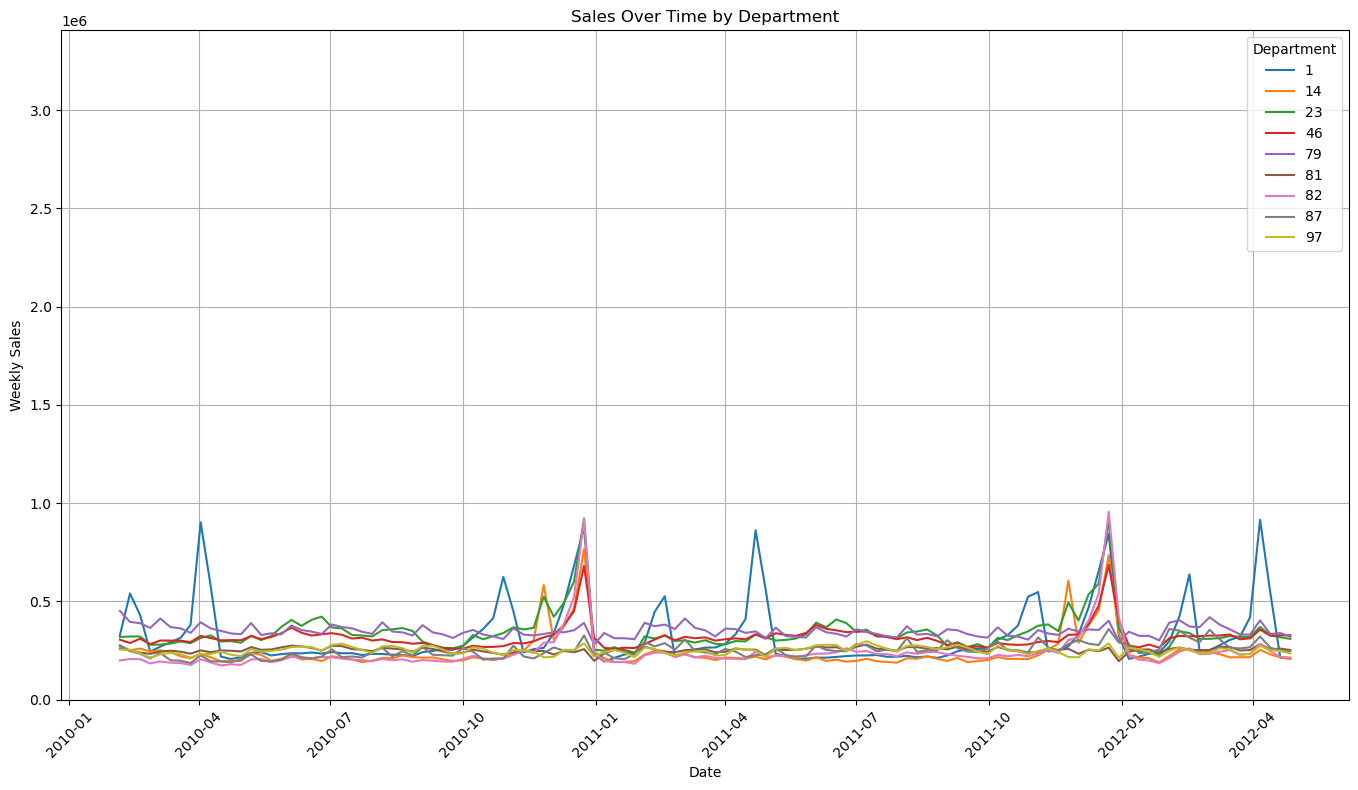

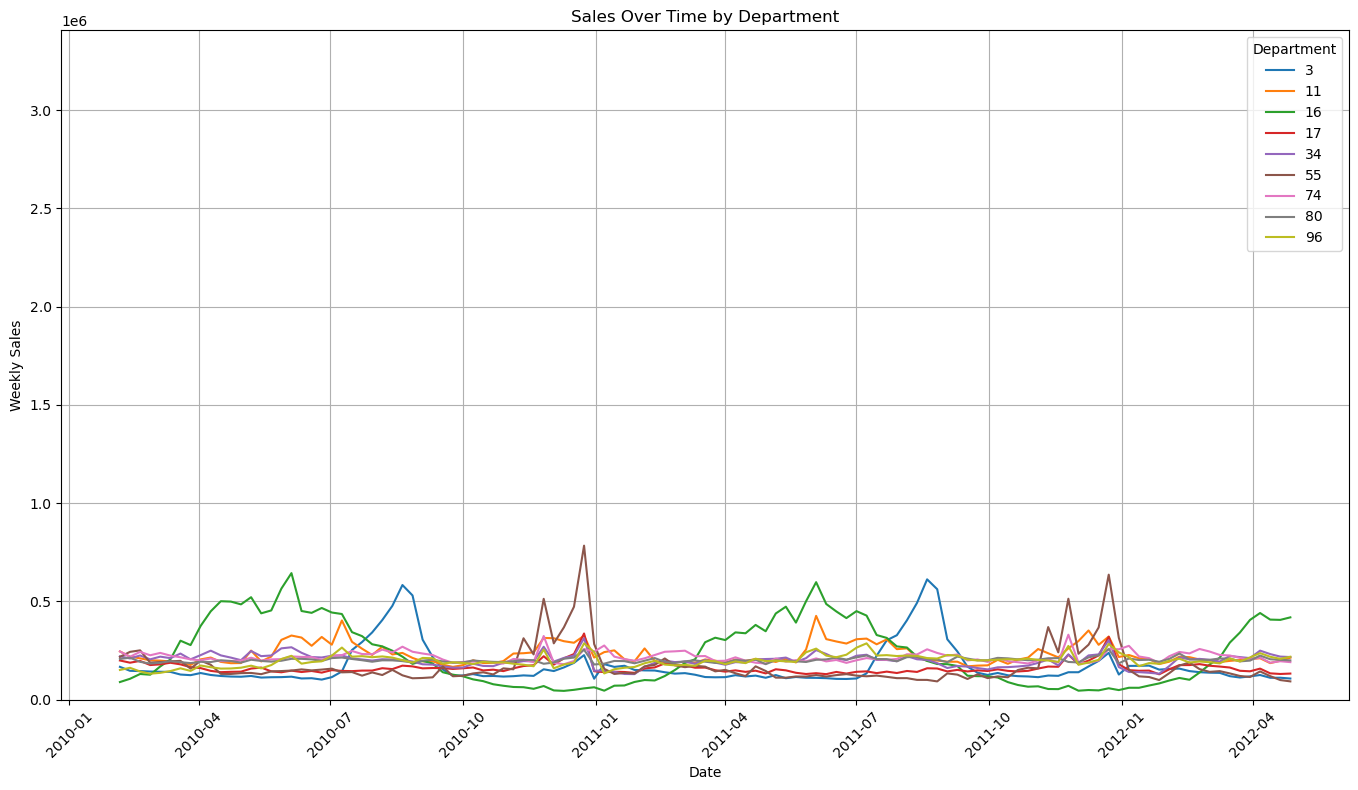

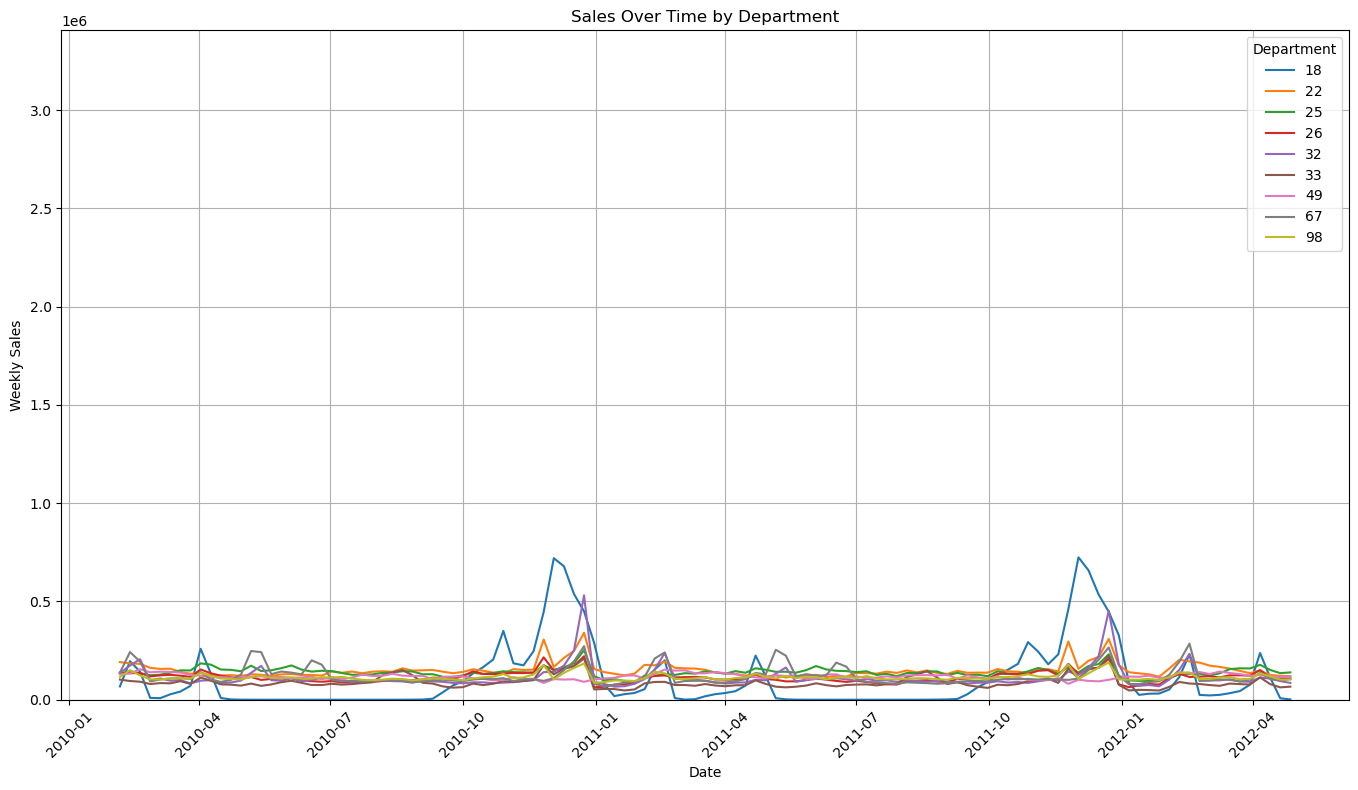

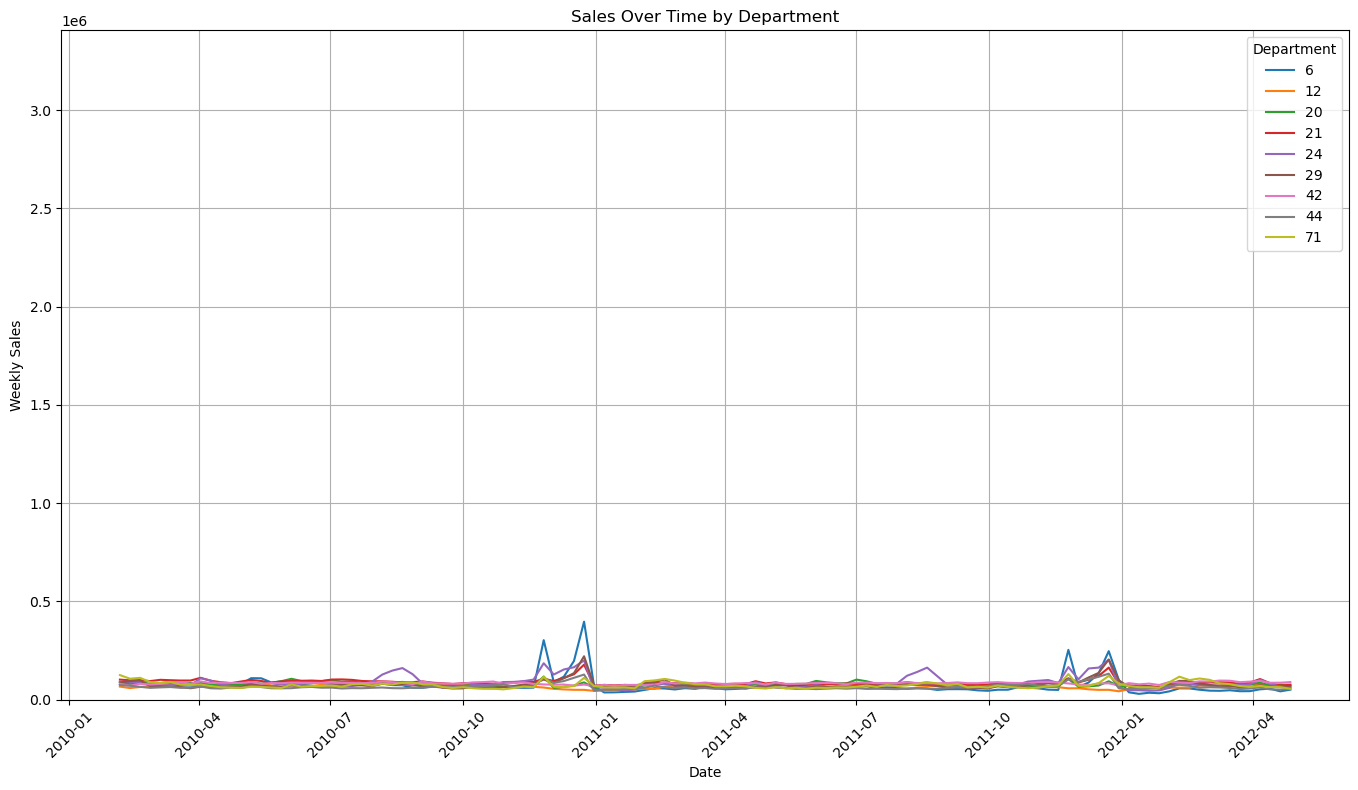

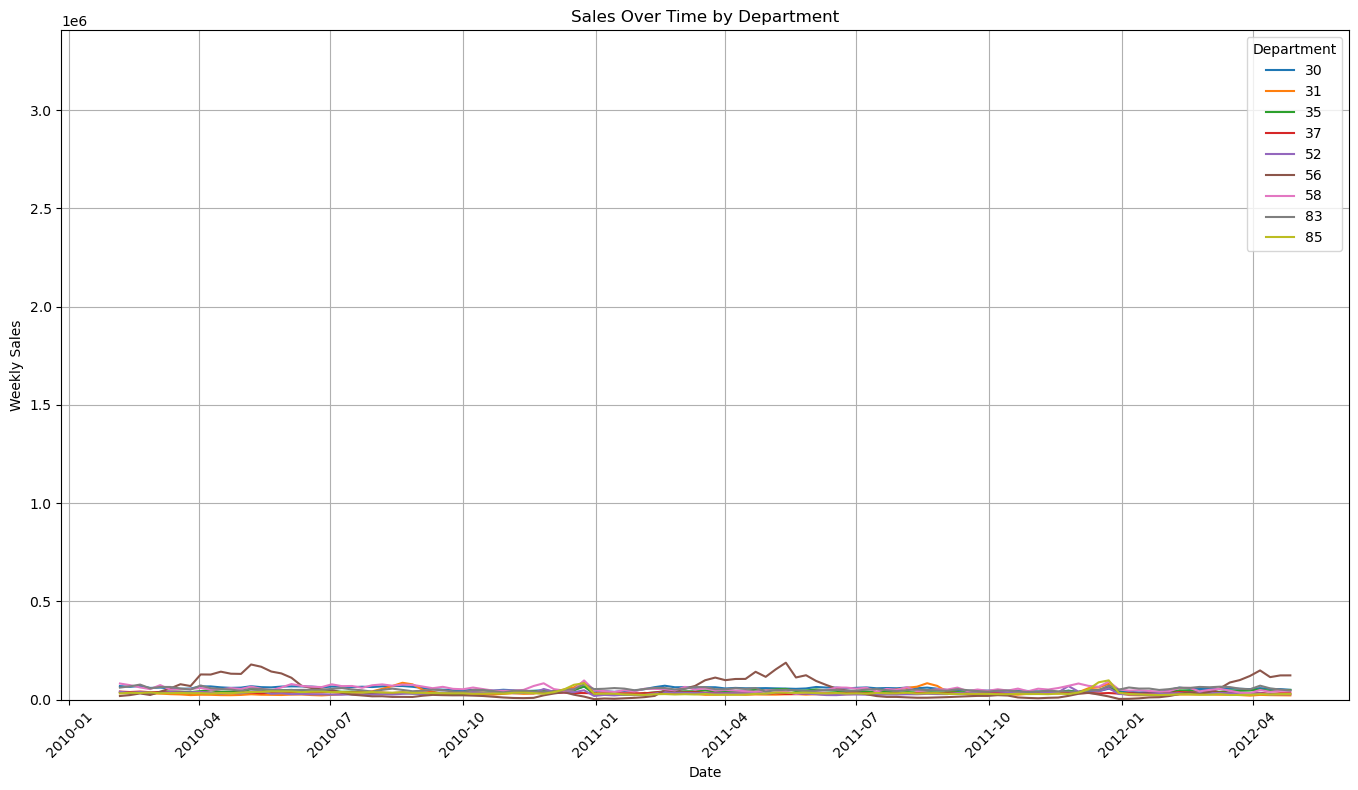

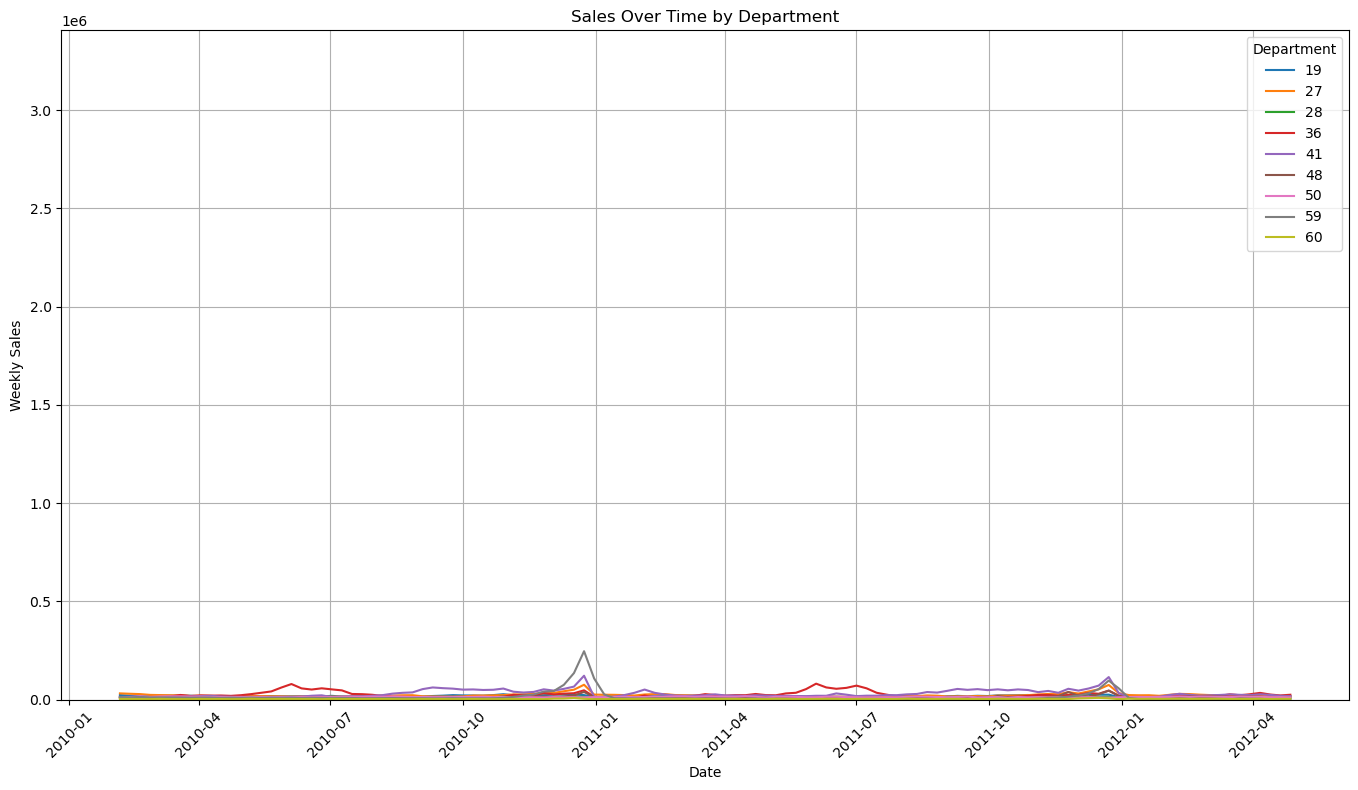

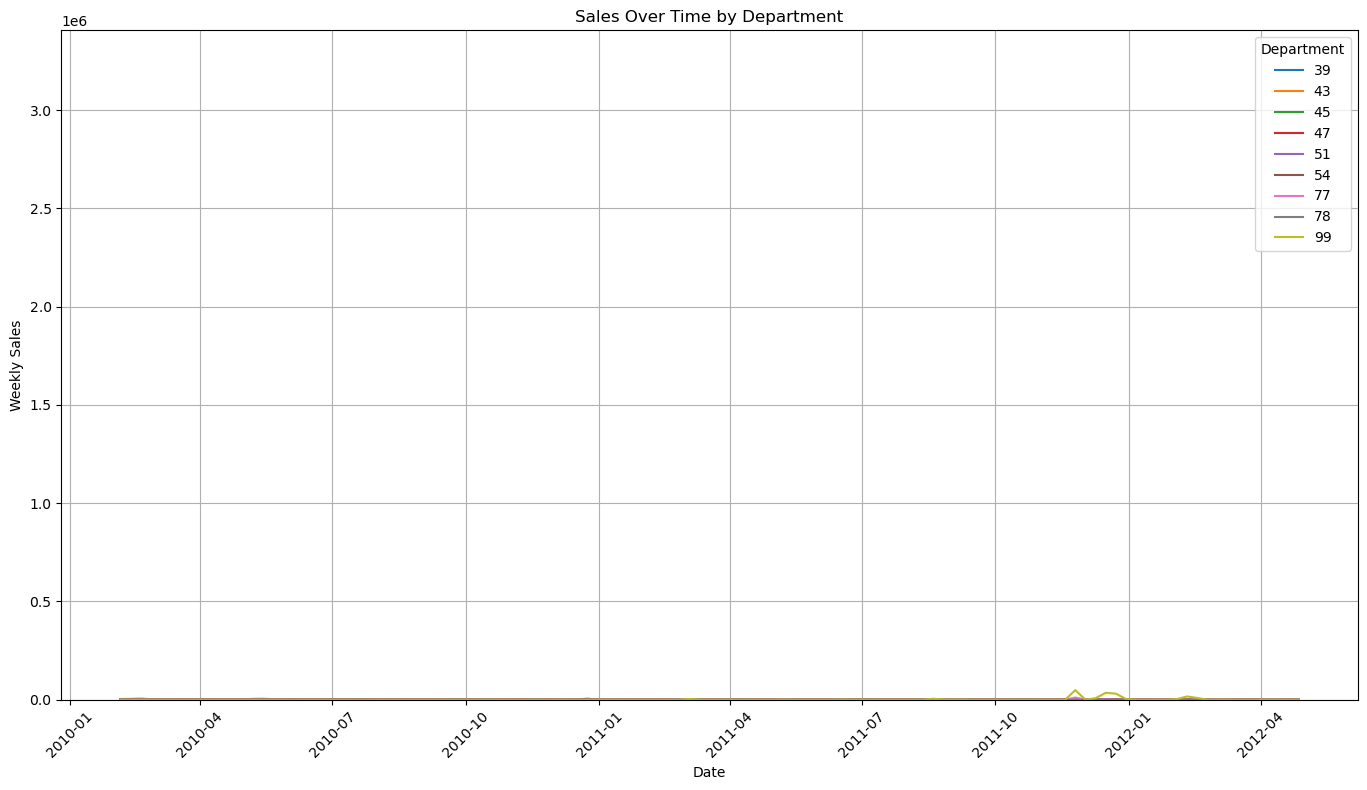

In [55]:
# set ymin to the maximum value of the data. So that all the relative height remains same accross the graphs.
y_min, y_max = 0, df_dept_weekly_sales.Weekly_Sales.max()
for i in range(9):
    dept_sublist = dept_list_dec_sales[(i*9): (i*9 + 9)]
    # print(dept_sublist)
    df_dept_weekly_sales_subset = df_dept_weekly_sales[df_dept_weekly_sales['Dept'].isin(dept_sublist)]
    palette = sns.color_palette("tab10", 10) 
    plt.figure(figsize=(14, 8))
    sns.lineplot(x='Date', y='Weekly_Sales', hue='Dept', data=df_dept_weekly_sales_subset, palette=palette)
    
    # Customize the plot
    plt.xlabel('Date')
    plt.ylabel('Weekly Sales')
    plt.title('Sales Over Time by Department')
    plt.legend(title='Department', loc='upper right')
    plt.xticks(rotation=45)
    plt.grid()
    plt.tight_layout()
    plt.ylim(y_min, y_max)
    plt.show()

#### Observation:
1. All the departments are not showing similar pattern.
2. Not all the product dept has spike during the Nov, Dec Jan period.

#### Analyze weekly sales data sccross all stores and departments

In [56]:
df_average_weekly_sales = df.groupby('Date')[['Weekly_Sales']].mean()
df_average_weekly_sales.reset_index(inplace=True)
df_average_weekly_sales['Weekly_Sales'] = df_average_weekly_sales['Weekly_Sales'].round(2)
# Extract the week number using isocalendar().week
df_average_weekly_sales['week_number'] = df_average_weekly_sales['Date'].dt.isocalendar().week
df_average_weekly_sales.head()

,Date,Weekly_Sales,week_number
0,2010-02-05,23722.33,5
1,2010-02-12,23328.20,6
2,2010-02-19,23158.27,7
3,2010-02-26,20441.64,8
4,2010-03-05,21730.82,9


In [57]:
# again groupby using the week number and take mean
df_average_weekno_sales = df_average_weekly_sales.groupby('week_number')[['Weekly_Sales']].mean()
df_average_weekno_sales.reset_index(inplace=True)
df_average_weekno_sales = df_average_weekno_sales.sort_values(by='Weekly_Sales', ascending=False)
df_average_weekno_sales['Weekly_Sales'] = df_average_weekno_sales['Weekly_Sales'].round(2)
df_average_weekno_sales.head(10)

,week_number,Weekly_Sales
50,51,38261.84
46,47,31117.90
49,50,29187.84
48,49,26640.18
6,7,23656.63
5,6,23510.23
47,48,23497.72
21,22,23301.66
13,14,23214.07
4,5,22626.56


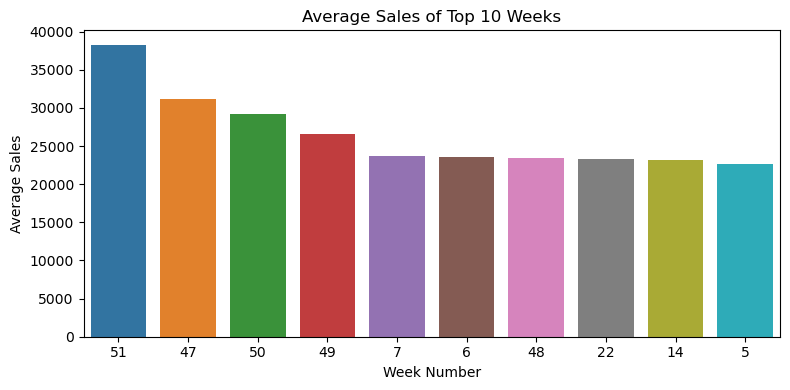

In [58]:
# Plot the data using Seaborn
plt.figure(figsize=(8, 4))
sns.barplot(x='week_number', y='Weekly_Sales', data=df_average_weekno_sales.head(10), order=df_average_weekno_sales['week_number'].head(10))
plt.xlabel('Week Number')
plt.ylabel('Average Sales')
plt.title('Average Sales of Top 10 Weeks')
plt.xticks()
plt.tight_layout()
plt.show()

#### Observation:
1. Highest sales observed during end of the year, 47, 48, 49, 50, 51  week. Apart from that 5, 6, 7, 14, 22 are in top 10 highest sales week.

#### Convert holiday flag from boolean to integer (0,1)

In [59]:
df.IsHoliday = df.IsHoliday.astype(int)
df.head(2)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,25037.08,0
1,1,1,2010-02-12,46247.44,1


#### Store this file locally for further use

In [60]:
# Store this file locally for further use
print(df.shape)
df.to_csv('sales_data_preprocessed.csv', index=False)

(90909, 5)


## Overall Conclusion:
1. Holiday week has impact on sales. Holiday week sale is more compared to non-holiday week accross stores.
2. There is a spike in store sale in the year-end (Nov, Dec) time.
3. Weekly selling pattern accross stores are similar but the range is different.
4. Weekly selling pattern accross all the departments are not similar but a group of departments shows similar pattern. And selling price range is also differnt accross departments.